# Problem Statement

Using the Craigslist Vehicles Dataset available on Kaggle (https://www.kaggle.com/datasets/mbaabuharun/craigslist-vehicles), we'd like you to create a Time-Series Model following the approach outlined below.

Here are the key steps:

1. Start by addressing missing values in the dataset. You can handle this by filling in missing values with the median for numerical columns and the mode for categorical columns. 
2. Ensure that the data types of the columns are appropriate. Specifically, make sure to convert the 'posting_date' column to a datetime data type.
3. Utilize the 'posting_date' column to create a datetime index for the dataset. This will facilitate the analysis of temporal patterns.
4. With clean data, explore it using various visualizations and statistical analysis techniques. This step is crucial for understanding temporal patterns, identifying seasonal trends, and analyzing demand-supply dynamics by region and vehicle type.
5. Build the time-series chart.
6. Finally, create a GitHub Repository and push your work there, also document your process through each of the steps and demonstrate your understanding by implementing them on the dataset.


# Data Understanding

The dataset consists of a substantial number of data points (426,880) across 26 different features. 
The descriptions of the features in the data are as follows:

1. id — Unique ID given to every Craigslist ad and is the primary key of the dataset.
2. url — URL of the car sale advertisement on the Craigslist website.
3. region — City where the sale is located.
4. region_url — Craigslist URL for sales in the region.
5. price — Sale price (in US dollars).
6. year — The year in which the car was manufactured.
7. manufacturer — The manufacturer of the car, with 42 unique businesses engaged in automobile manufacturing.
8. model — The exact model of the car, such as "sierra classic 2500hd.
9. condition — The condition of the car, which can be "new," "like new," "excellent," "good," "fair," or "salvage."
10. cylinders — The number of cylinders in the car engine, ranging from 3 to 12, with an "other" category.
11. fuel — The type of fuel used, including "diesel," "gas," "electric," "hybrid," and "other.
12. odometer — The total number of miles driven by the car.
13. title_status — The legal status of the vehicle, which can be "clean," "lien," "rebuilt," "salvage," "parts only," or "missing."
14. transmission — The type of gearbox in the vehicle, which can be "automatic," "manual," or "other."
15. VIN — A unique vehicle identification number.
16. drive — The type of drive axle in the vehicle, which can be "4WD" (Four-wheel drive), "FWD" (Front-wheel drive), or "RWD" (Rear-wheel drive).
17. size — The size of the vehicle's body.
18. type — The type of vehicle body, identifying if it's an SUV, a mini-van, or one of 13 unique values.
19. paint_color — The exterior paint color of the vehicle.
20. image_url — URL of the main image in the Craigslist sale advertisement.
21. county — The county where the sale is located.
22. state — The state, represented in a short form (e.g., "fl" for the state of Florida).
23. lat — Latitude in decimal degrees where the sale is located.
24. long — Longitude in decimal degrees where the sale is located.
25. posting_date — Date and time of the advertisement's posting on Craigslist in the format YYYY-MM-DDTHH:MM:SS±HH:MM.
26. removal_date - Date and time of removal of the posting on Craigslist with the same format as posting_date.
    

We start with importing the necessary libraries for the analysis. Then loading the data to be used in the project.

In [124]:
# Importing libraries
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, Input, Output, dcc, html

import datetime as dt
from sklearn.impute import SimpleImputer

%matplotlib inline
pd.set_option("display.max_columns", None)
plt.style.use('ggplot')

In [2]:
def data_outlook(data: pd.DataFrame()):
    """
    Input:
    A dataframe

    Returns:
    A general overview of the data and its characteristics
    """
    # Shape
    shape = data.shape
    print(f"There are {shape[0]} records and {shape[1]} features in the data", end='\n\n')
    # Data Info
    print(data.info())
    # Numerical data description
    display('Numerical data description:', data.describe(include=['int', 'float']))
    # Categorical data description
    display('Categorical data summary:', data.describe(include='object'))

In [3]:
# Load data
data = pd.read_csv(r"craigslist_vehicles.csv")

data.head(3)

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date,removal_date
0,362773,7307679724,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,NaN,gas,184000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00
1,362712,7311833696,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,NaN,gas,184000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00
2,362722,7311441996,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4900,2006.0,toyota,camry,excellent,4 cylinders,gas,184930.0,clean,automatic,NaN,fwd,NaN,sedan,silver,https://images.craigslist.org/00808_5FkOw2aGjA...,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,NaN,tx,32.453848,-99.787900,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00


Based on the understanding of the problem, some features do not provide any relevant information. I will drop these features

In [4]:
data.drop(columns=['url', 'region_url', 'image_url', 'Unnamed: 0', 'lat', 'long'], inplace=True)

We are going to have a look at the information of the dataset, the number of records and datatypes of the features

In [5]:
data_outlook(data)

There are 426880 records and 22 features in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 

'Numerical data description:'

,id,price,year,odometer,county
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN


'Categorical data summary:'

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date,removal_date
count,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426810,426880,426812,426812
unique,404,42,29667,6,8,5,6,3,118264,3,4,13,12,360911,51,32,88
top,columbus,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,ca,2021-05-04 00:00:00+00:00,2021-05-09 00:00:00+00:00
freq,3608,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,231,50614,34294,13594


The county feature does not have any non-null records meaning its a 'null' feature which I will proceed to drop.

In [6]:
data.drop('county', axis=1, inplace=True)

Next we will check the percentage of missing values in the features of our data.

In [7]:
na_percentage = round(data.isna().sum() / data.shape[0] * 100, 2)
na_percentage

id               0.00
region           0.00
price            0.00
year             0.28
manufacturer     4.13
model            1.24
condition       40.79
cylinders       41.62
fuel             0.71
odometer         1.03
title_status     1.93
transmission     0.60
VIN             37.73
drive           30.59
size            71.77
type            21.75
paint_color     30.50
description      0.02
state            0.00
posting_date     0.02
removal_date     0.02
dtype: float64

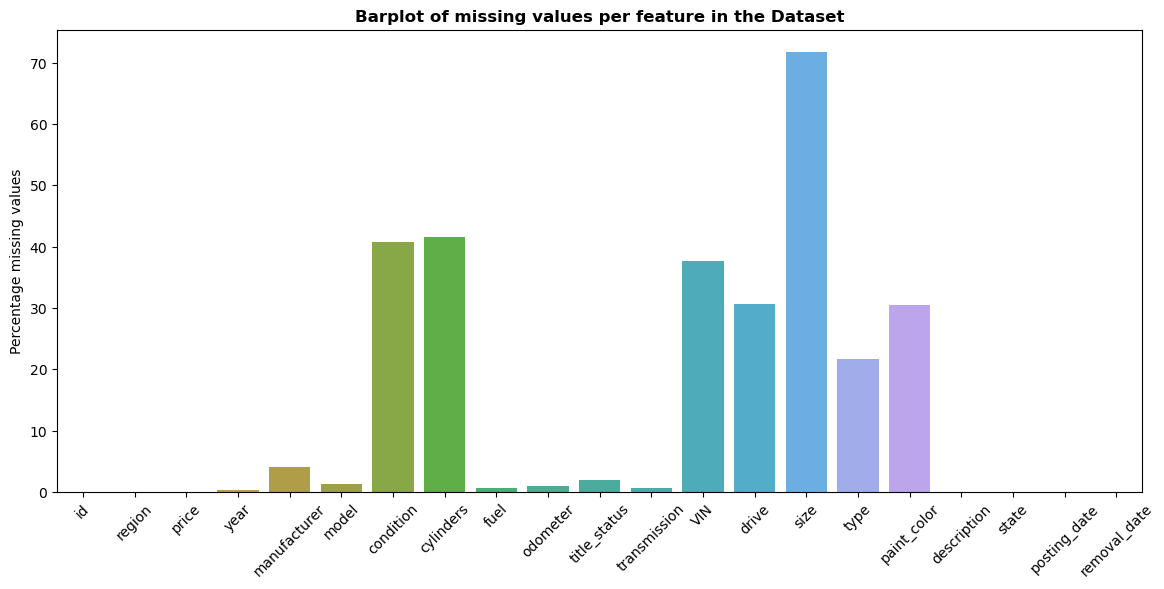

In [8]:
# Barplot of the missing values per feature
plt.figure(figsize=(14, 6))
sns.barplot(x=data.columns, y=na_percentage)
plt.title("Barplot of missing values per feature in the Dataset", fontweight='bold')
plt.ylabel("Percentage missing values")
plt.xticks(rotation=45)
plt.show()

Size feature has a high number of missing values, ~70%. A decision on what to do to it will be done after some considerations.

Posting date will be the index feature later on therefore missing values in this feature will be dealt with by dropping them. For the rest of the features, we will first try to fill the missing values by some data manipulation. Thereafter, if some features still retain > 40% missing values, we will drop them. For the remaining ones, numerical features will be filled by the median, and catergorical features will be filled with their modes (most_frequent).

In [9]:
data.dropna(subset=['posting_date'], inplace=True)

Lets check the distribution of categories in the categorical features, however restricting it to features with less than or equal to 100 categories.

In [10]:
cat_cols = data.select_dtypes(include='object').columns.to_list()
cat_cols_less100 = [x if data[x].nunique() <= 100 else None for x in cat_cols]
num_cols = data.select_dtypes(include=['int', 'float']).columns.to_list()

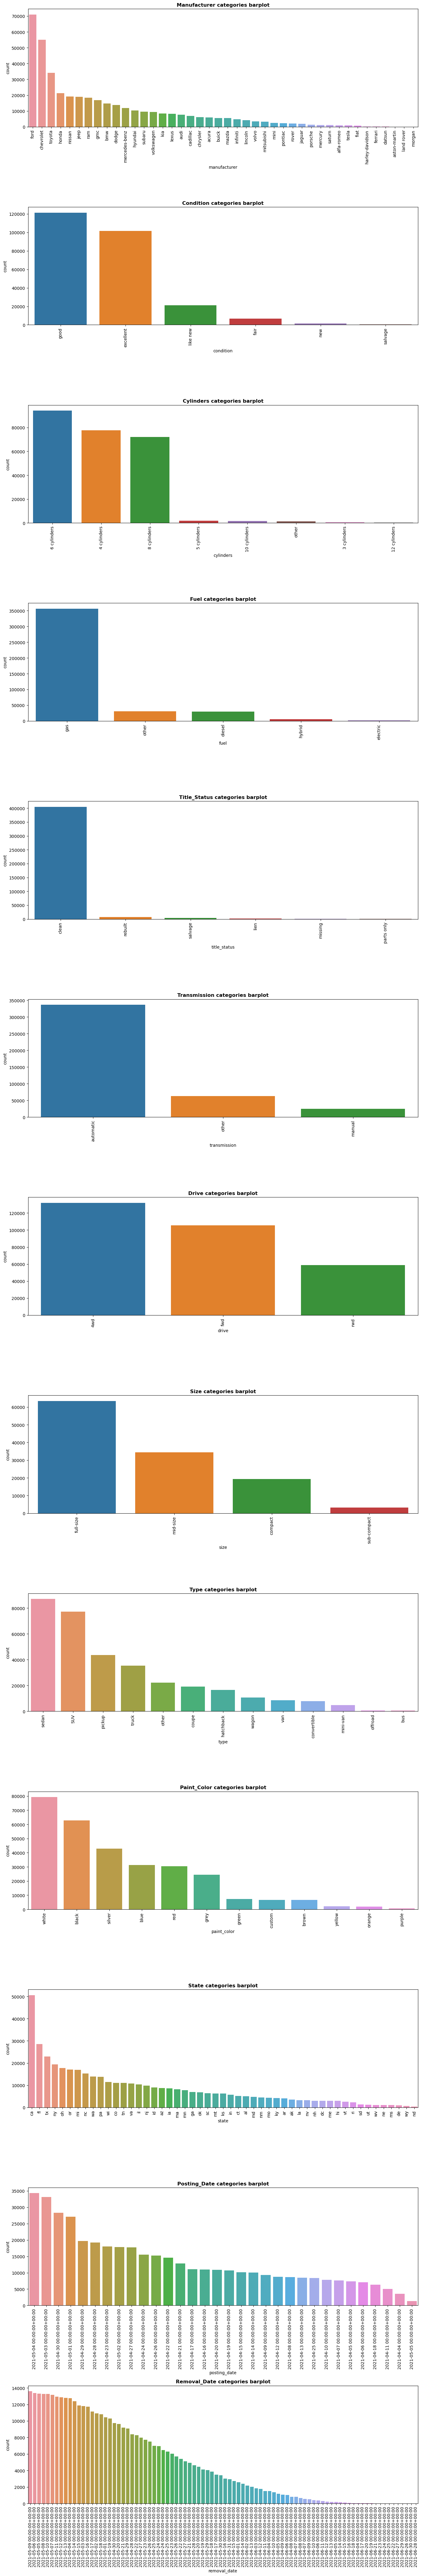

In [11]:
# Barplots for categorical features
fig, ax = plt.subplots(figsize=(14, 5*len(cat_cols)), nrows=len(cat_cols)-4)
index = 0
for column in cat_cols:
    dataframe = data[column]
    if dataframe.nunique() <= 100 and column != None:
        axis = ax[index]
        col_value_counts = dataframe.value_counts()
        sns.barplot(x=col_value_counts.index, y=col_value_counts, ax=axis)
        axis.set_title(f"{column.title()} categories barplot", fontweight='bold')
        axis.tick_params(axis='x', rotation=90)
        index += 1

    else:
        pass
    
fig.tight_layout()
plt.show()

Some categories depict unusable or subpar quality vehicles e.g non-clean title status vehicles and salvage condition vehicles. I will further look into how to deal with that later.

Next is histograms for the numerical features in the dataset.

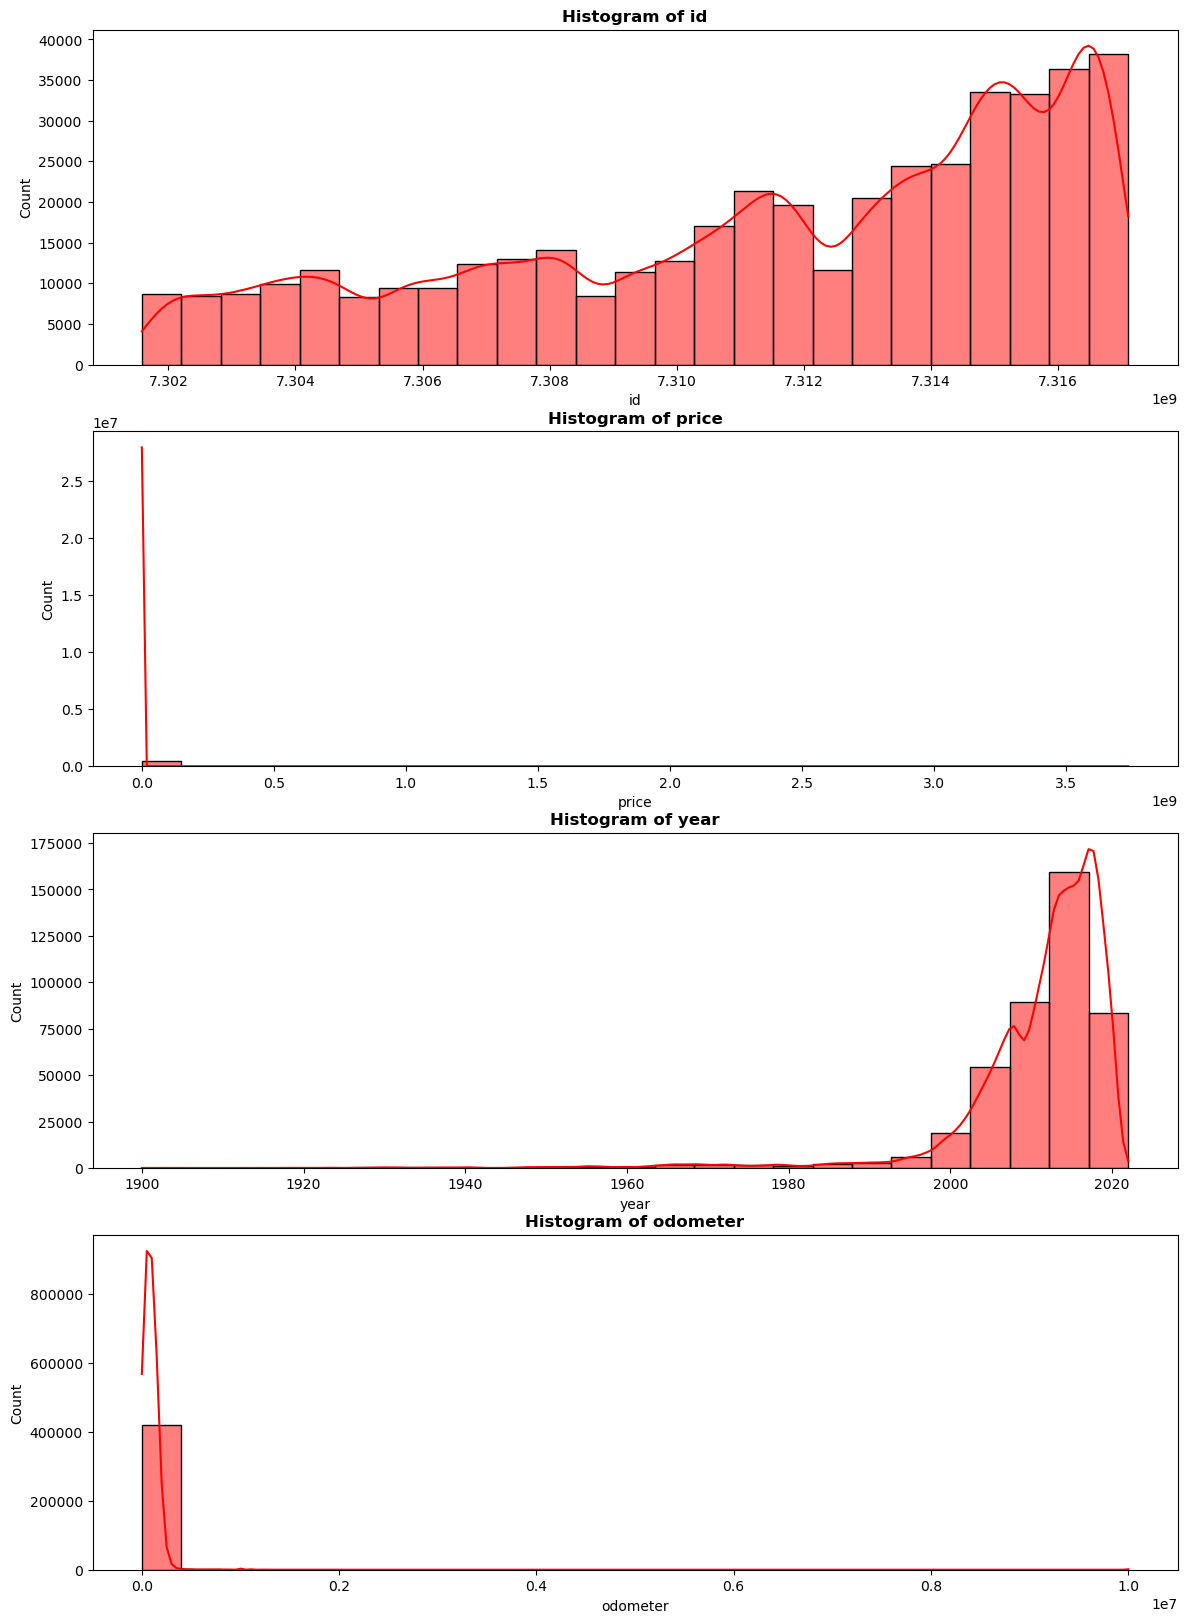

In [12]:
# Histograms for numerical features
fig, ax = plt.subplots(figsize=(14, 5*len(num_cols)), nrows=len(num_cols))
index = 0

for column in num_cols:
    axis = ax[index]
    sns.histplot(data[column], bins=25, kde=True, color='red', ax=axis)
    axis.set_title(f"Histogram of {column}", fontweight='bold')
    index += 1

Clearly there are anomalous records in Price and odometer features. These will be sorted out during data cleaning.

# Data Cleaning

We can save the shape of the dataset before cleaning to compare with the shape after cleaning

In [13]:
shape_before_cleaning = data.shape
print(shape_before_cleaning)

(426812, 21)


We can use VIN (Vehicle Identification Number) feature to check for duplicates in the data before anything else.

In [14]:
data['VIN'].value_counts()

VIN
1FMJU1JT1HEA52352    261
3C6JR6DT3KG560649    235
1FTER1EH1LLA36301    231
5TFTX4CN3EX042751    227
1GCHTCE37G1186784    214
                    ... 
1FT7W2BT2JEC06389      1
2C3CDXGJ6JH253141      1
2C3CDXGJ0JH167095      1
2C3CDXHG8JH134932      1
1FTPX14526FB67374      1
Name: count, Length: 118264, dtype: int64

As we can see some vehicles have > 200 records about them. Lets look at one of the instances.

In [15]:
data[data['VIN'] == "1FMJU1JT1HEA52352"].head(2)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date,removal_date
499,7311883703,akron / canton,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,Carvana is the safer way to buy a car During t...,oh,2021-04-24 00:00:00+00:00,2021-05-06 00:00:00+00:00
2675,7311902781,albany,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,Carvana is the safer way to buy a car During t...,ny,2021-04-24 00:00:00+00:00,2021-05-08 00:00:00+00:00


All advertisements of this car were posted on the same day. Therefore, these records could be duplicated due to the car being posted on multiple states/regions. We will drop these duplicate records basing on VIN, year, manufacturer, model to ensure that these are true duplicates we are dropping.

In [16]:
data.drop_duplicates(subset=['VIN', 'year', 'manufacturer', 'model'], keep='first', inplace=True)

# Resetting the index
data.reset_index(drop=True, inplace=True)

Now that there are no duplicates left in the data, we will proceed to correct the datatypes of some features.

In [17]:
# Changing data type for temporal data
data['posting_date'] = pd.to_datetime(data['posting_date'])
data['removal_date'] = pd.to_datetime(data['removal_date'])

Lets see the temporal range of our dataset.

In [18]:
# Posting date description
data['posting_date'].describe()

count                              162224
mean     2021-04-23 11:23:28.363744+00:00
min             2021-04-04 00:00:00+00:00
25%             2021-04-17 00:00:00+00:00
50%             2021-04-26 00:00:00+00:00
75%             2021-05-01 00:00:00+00:00
max             2021-05-05 00:00:00+00:00
Name: posting_date, dtype: object

The data spans the period of April 4th to May 5th 2021. That is approximately a month.

In [19]:
# Correcting other datatypes
data['id'] = data[['id']].astype(dtype='object')

Next we will look at the presence of outliers in the numerical features.

### Price

Usually for a price feature a boxplot would be enough to decide on the outliers in the feature. However, our dataset consists of different cars of different manudfacture years and as such, the prices will vary. In consideration of this, we will check for outliers in price by year.

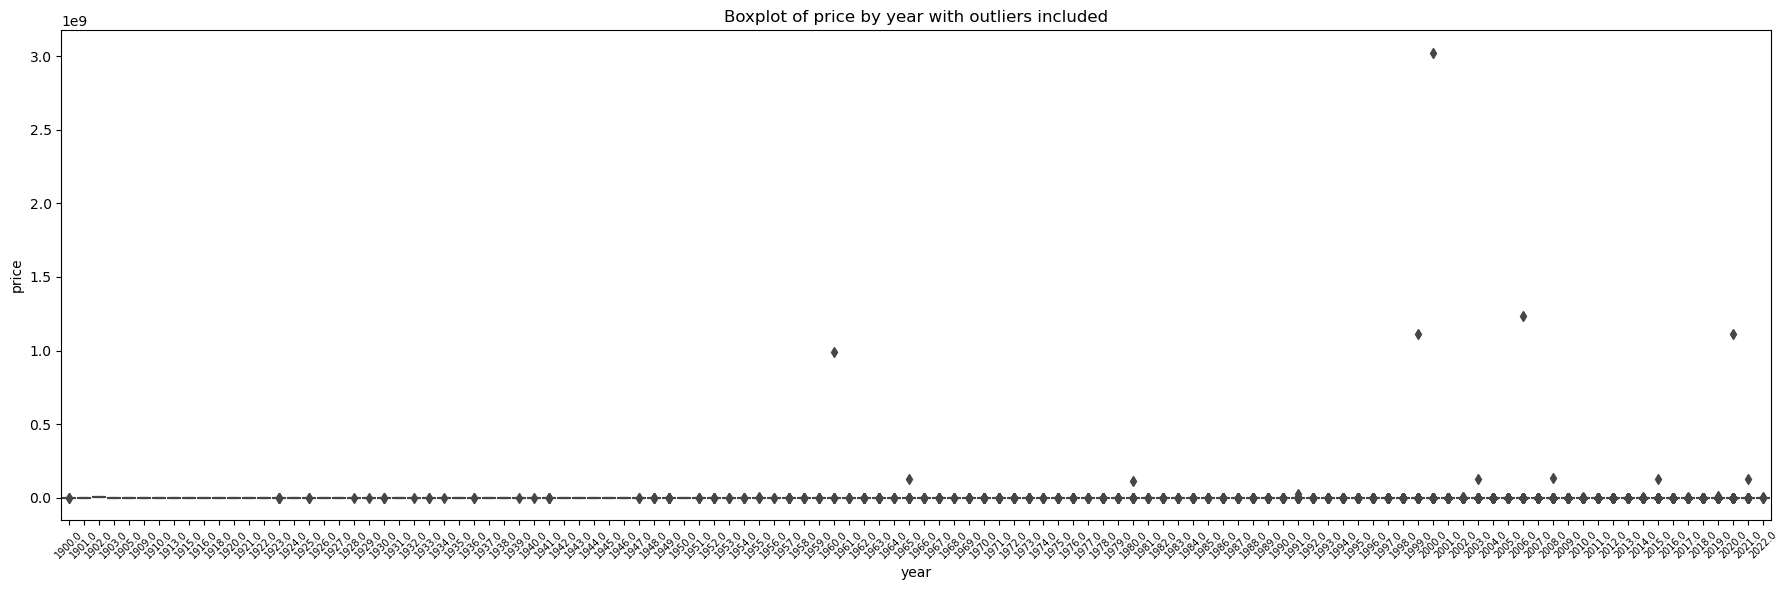

In [20]:
# Boxplot with outliers 
plt.figure(figsize=(18, 6))
sns.boxplot(data=data, x='year', y='price')
plt.title("Boxplot of price by year with outliers included")
plt.xticks(rotation=45, fontsize=7)
plt.tight_layout()
plt.show()

From the graphs axis view, the upper limit for the y axis is > 3.0E9 which is not possible. Lets look at the boxplots without outliers.

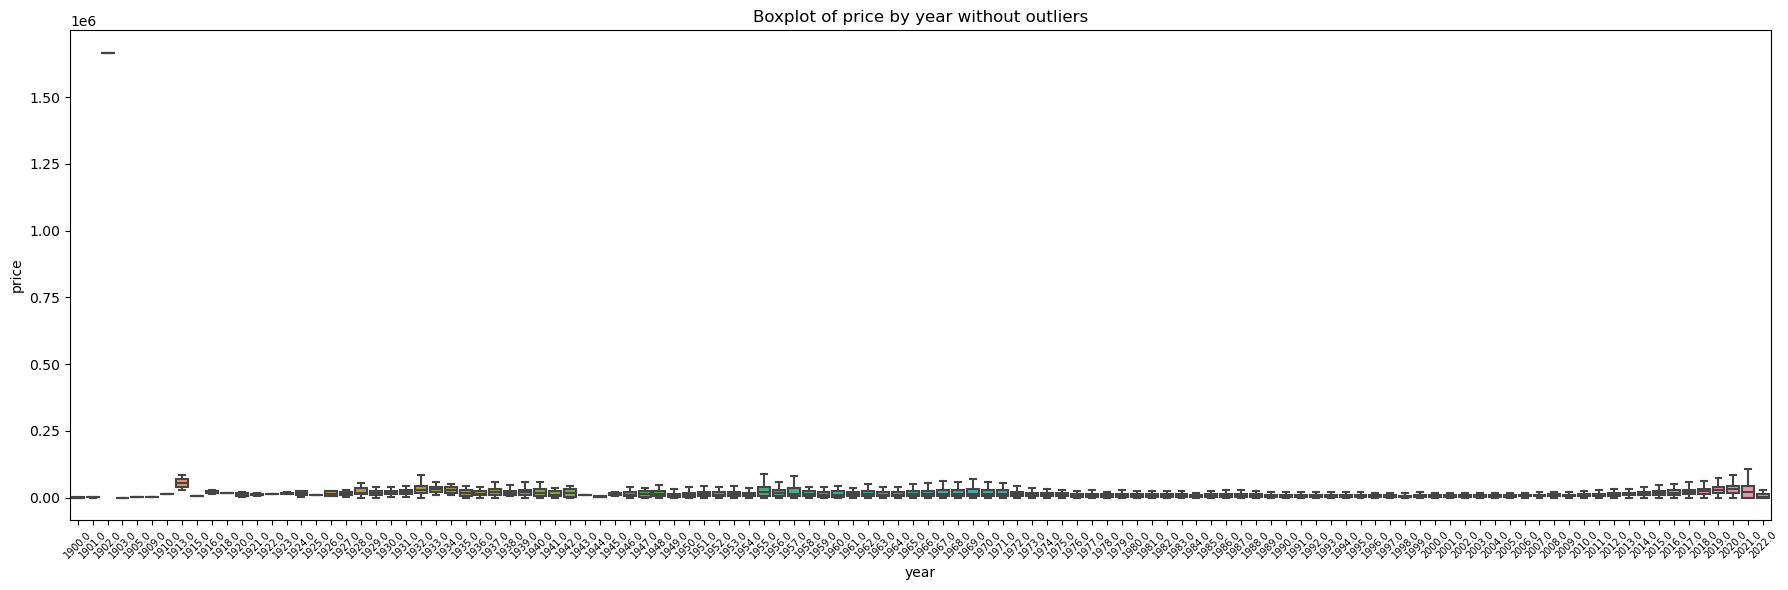

In [21]:
# Boxplot without outliers 
plt.figure(figsize=(18, 6))
sns.boxplot(data=data, x='year', y='price', showfliers=False)
plt.title("Boxplot of price by year without outliers")
plt.xticks(rotation=45, fontsize=7)
plt.tight_layout()
plt.show()

In 1902, the boxplot falls above 1.0E6 and is the only one with a price over 1.0E6. We will drop any values above 1.0E6 considering that only 21 records fall above that threshold.

Also there are records that fall below 10$ which doesn't make much sense considering the we are dealing with a vehicles dataset. These two steps will be done before proceeding to drop price outiers by year.

In [22]:
data[data['price'] <= 10].size, data[data['price'] >= 1E6].size  # Number of general outliers, from both lower and upper bounds

(316365, 441)

In [23]:
less_10_price = data[data['price'] <= 10].index
greater_1mil_price = data[data['price'] >= 1E6].index

# Dropping the general outliers
data.drop(index=greater_1mil_price, inplace=True)
data.drop(index=less_10_price, inplace=True)

In [24]:
# Dropping outliers by year
for year in data['year'].unique():
    Q1 = data[data['year'] == year]['price'].quantile(0.25)
    Q3 = data[data['year'] == year]['price'].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    data = data[~((data['price'] < lower) & (data['price'] > upper))]

### Odometer

This is the milage reading of the car being sold. Using boxlots we are looking to detect the presence of outliers. 

In [25]:
data['odometer'].describe()

count    1.463020e+05
mean     1.046176e+05
std      2.299141e+05
min      0.000000e+00
25%      4.555425e+04
50%      9.275450e+04
75%      1.370000e+05
max      1.000000e+07
Name: odometer, dtype: float64

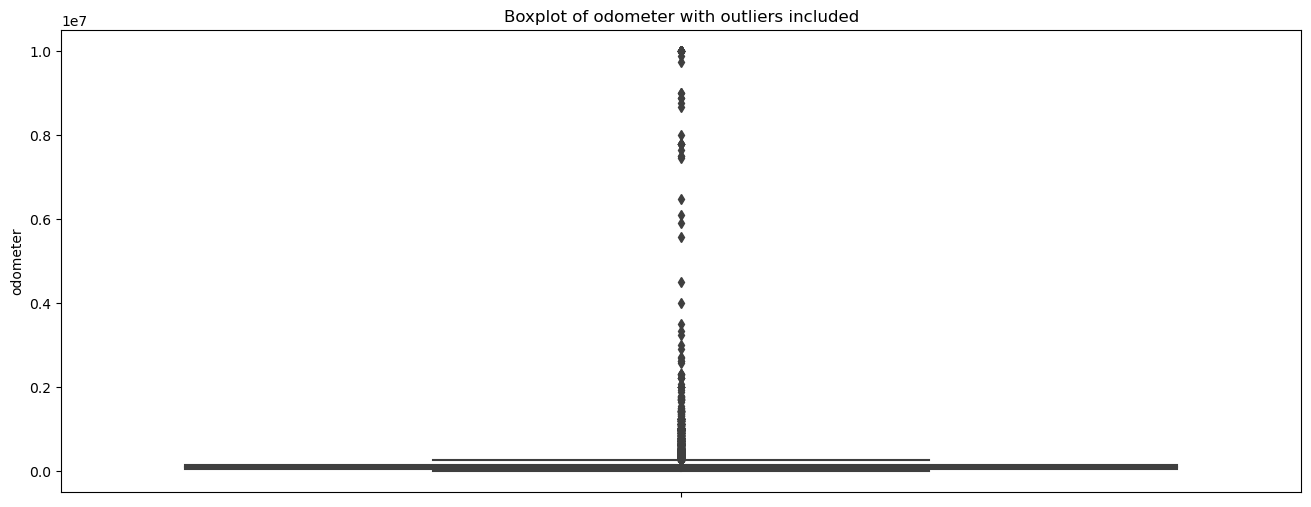

In [26]:
# Boxplot with outliers
plt.figure(figsize=(16, 6))
sns.boxplot(data=data, y='odometer')
plt.title("Boxplot of odometer with outliers included")
plt.show()

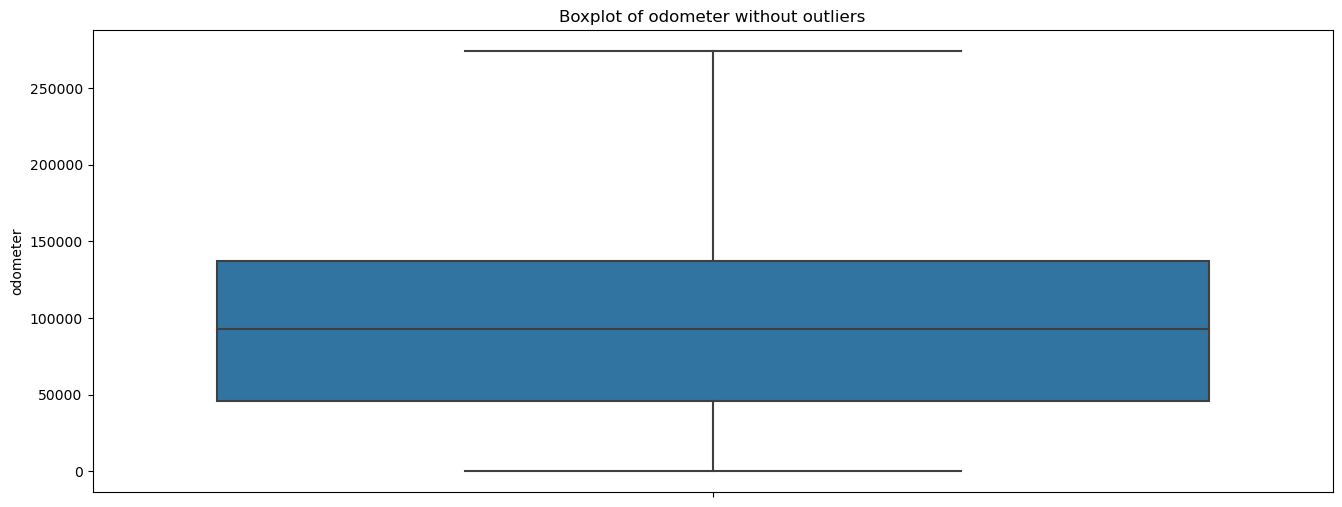

In [27]:
# Boxplot without outliers
plt.figure(figsize=(16, 6))
sns.boxplot(data=data, y='odometer', showfliers=False)
plt.title("Boxplot of odometer without outliers")
plt.show()

There is a record of 10million miles odometer reading which doesn't make sense. Considering that the 3rd quartile of odometer is ~130000 I will use a threshold of 300000 miles as the upper limit for outliers according to the distribution is ~275000.

To note is that there are ~12000 cars are recorded as having odometer readings of 0.

In [28]:
data[data['odometer'] > 3E5].size

27531

In [29]:
# Dropping values greater than 400 thousand odometer reading
data = data[~(data['odometer'] > 3E5)]

### Year

In [30]:
year_value_vounts = data['year'].value_counts().reset_index().sort_values(by='year')

display(year_value_vounts.head(10), year_value_vounts.tail(10))

,year,count
97,1900.0,4
98,1901.0,3
104,1905.0,1
100,1910.0,2
109,1913.0,1
108,1915.0,1
99,1916.0,2
105,1918.0,1
101,1920.0,2
102,1921.0,2


,year,count
2,2013.0,10253
4,2014.0,9958
3,2015.0,10203
5,2016.0,9367
1,2017.0,10812
0,2018.0,10894
7,2019.0,7400
12,2020.0,5236
22,2021.0,996
74,2022.0,48


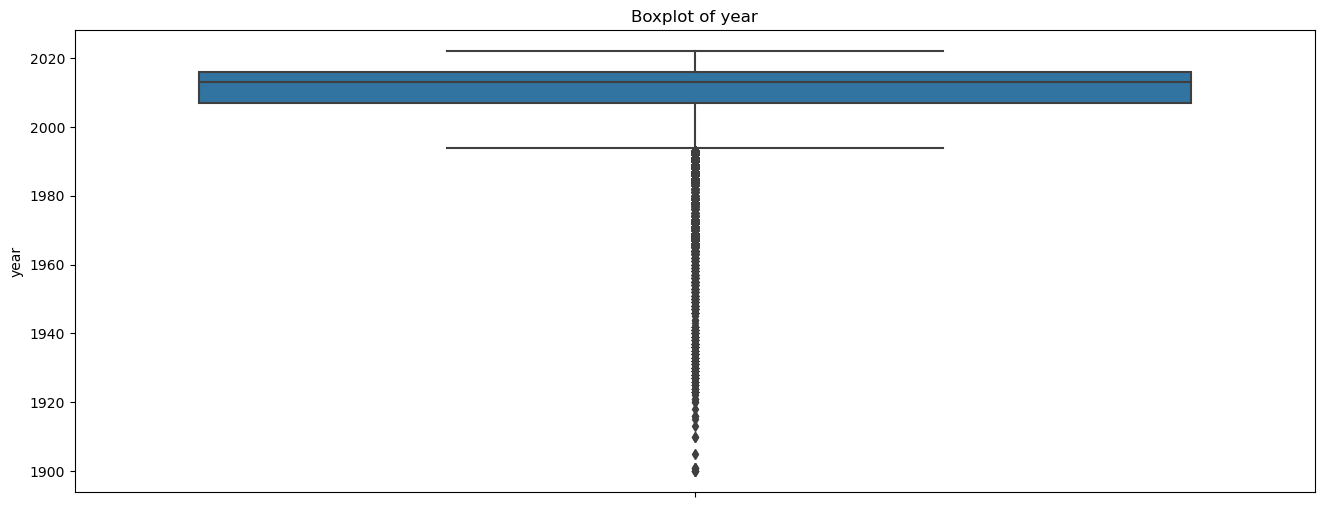

In [31]:
# Boxplot of year
plt.figure(figsize=(16, 6))
sns.boxplot(data=data, y='year')
plt.title("Boxplot of year")
plt.show()

We will drop year values less than and equal to 1920 as they are low in number having only 17 records falling in that range.

In [32]:
# Dropping year records less than 1920
year_less_1920 = data[data['year'] <= 1920].index

data.drop(index=year_less_1920, inplace=True)

### Car condition and title status

In [33]:
display(data['condition'].value_counts(), data['title_status'].value_counts())

condition
excellent    41886
good         32228
like new      7868
fair          2771
new            584
salvage        220
Name: count, dtype: int64

title_status
clean         137329
rebuilt         2712
salvage         1289
lien             608
missing          383
parts only        72
Name: count, dtype: int64

The analysis should involve the sale of cars in good working condition, some categories e.g. parts only and missing and salvage car condition do not meet this criteria and will be dropped from the dataset.

In [34]:
data = data[~((data['title_status'] == 'parts only') | (data['title_status'] == 'missing') | (data['title_status'] == 'lien') | (data['condition'] == 'salvage'))]

Now let's check the shape of the dataset after all the manipulations so far.

In [35]:
data.shape, shape_before_cleaning

((144565, 21), (426812, 21))

We will check the current state of percentage missing values in our dataset. Lets save the current missing values as a variable.

In [36]:
na_before_filling = data.isna().sum(0) / data.shape[0] * 100

na_before_filling

id               0.000000
region           0.000000
price            0.000000
year             0.401895
manufacturer     5.489572
model            0.951821
condition       41.550859
cylinders       36.287483
fuel             0.939370
odometer         0.578287
title_status     2.363643
transmission     0.621866
VIN             25.925362
drive           24.819285
size            69.124615
type            19.115969
paint_color     26.822537
description      0.001383
state            0.000000
posting_date     0.000000
removal_date     0.000000
dtype: float64

We will drop the size feature as it has too many missing values as for the rest of the features, numerical ones will be filled by the median while categorical ones being filled by modes.

In [37]:
data.drop(columns='size', inplace=True)

In [38]:
# Filling missing values
numerical_df = data.select_dtypes(include=['int', 'float'])
non_numeric_df = data.select_dtypes(exclude=['int', 'float'])

# Instantiating the missing value imputers
numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
non_numeric_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Fitting and transforming
numerical_df = pd.DataFrame(numerical_imputer.fit_transform(numerical_df), columns=numerical_df.columns, index=numerical_df.index)
non_numeric_df = pd.DataFrame(non_numeric_imputer.fit_transform(non_numeric_df), columns=non_numeric_df.columns, index=non_numeric_df.index)

# Forming back the whole dataframe
data = numerical_df.join(non_numeric_df)

## Indexing the posting_date feature

In [39]:
data.set_index(keys='posting_date', drop=True, inplace=True)  # Making posting_date the index column to change data time series
data.sort_index(inplace=True)  # Sorting the data by index

In [40]:
data.head(3)

,price,year,odometer,id,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,type,paint_color,description,state,removal_date
posting_date,,,,,,,,,,,,,,,,,,,
2021-04-04 00:00:00+00:00,14995.0,2012.0,143049.0,7301662017,louisville,cadillac,srx,excellent,6 cylinders,gas,clean,automatic,3GYFNDE30CS506957,4wd,SUV,black,2012 Cadillac SRX 4d SUV AWD Luxury Offere...,ky,2021-04-28 00:00:00+00:00
2021-04-04 00:00:00+00:00,28590.0,2017.0,67004.0,7301711472,albany,infiniti,q60 3.0t premium coupe,good,6 cylinders,gas,clean,other,JN1EV7EL9HM552316,4wd,coupe,black,Carvana is the safer way to buy a car During t...,ny,2021-04-19 00:00:00+00:00
2021-04-04 00:00:00+00:00,24999.0,2018.0,21908.0,7301720334,bellingham,kia,sportage,excellent,other,gas,clean,automatic,KNDPNCAC6J7433874,4wd,SUV,white,Joydrive: 253-201-0804 https://joydrive.com/...,wa,2021-04-21 00:00:00+00:00


We have 144565 records however the posting date range is only for 32 days. This means that there are multiple postings being done a day. We can make the assumption that all car postings get bought by customers and that would mean that there are multiple sales of cars per day. 

But first we have to select the necessary features for the rest of the analysis.

## Selecting neccessary features

There were a lot of features with a high volume of missing values, therefore, I will select features that had less than 10% missing values. This way less bias will be introduced to the data thus yielding more accurate results after analysis.

The features selected are: region, price, year, manufacturer, model, fuel, odometer, title_status, transmission, and state

In [41]:
# Showing missing values before filling in support of my point above
na_before_filling

id               0.000000
region           0.000000
price            0.000000
year             0.401895
manufacturer     5.489572
model            0.951821
condition       41.550859
cylinders       36.287483
fuel             0.939370
odometer         0.578287
title_status     2.363643
transmission     0.621866
VIN             25.925362
drive           24.819285
size            69.124615
type            19.115969
paint_color     26.822537
description      0.001383
state            0.000000
posting_date     0.000000
removal_date     0.000000
dtype: float64

In [42]:
# Dropping the features
df = data[['region', 'price', 'year', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status', 'transmission', 'state']].copy()

In [43]:
df.tail()

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,state
posting_date,,,,,,,,,,
2021-05-05 00:00:00+00:00,new york city,11000.0,2010.0,infiniti,ex35 journey,gas,90700.0,clean,automatic,ny
2021-05-05 00:00:00+00:00,seattle-tacoma,44999.0,2020.0,jeep,lifted gladiator sport 4x4,gas,14325.0,clean,automatic,wa
2021-05-05 00:00:00+00:00,seattle-tacoma,79999.0,2018.0,ford,lifted f350 diesel platinum,diesel,33144.0,clean,automatic,wa
2021-05-05 00:00:00+00:00,seattle-tacoma,3999.0,2005.0,chevrolet,malibu maxx,gas,165871.0,clean,automatic,wa
2021-05-05 00:00:00+00:00,austin,18700.0,2019.0,nissan,murano,gas,20000.0,rebuilt,automatic,tx


# EDA

In this analysis we seek to extract information from the data to help us answer the following questions:

- In the context of time series analysis

1. What is the average price of cars posted per day?
2. What is the count of cars posted per day?
3. What is the average price of cars posted per day per region/state?
4. What is the count of cars posted per day per region/state?

- Further investigation of the data's characteristics:

1. What car manufacturers are most popular?
2. What car models are popular?
3. What car models fetch high prices?
4. What is the relation of odometer to price?
5. What is the relation of year to price?

## Average price and Count of cars posted per day

In [44]:
# Calculating average price and count of vehicle postings per day
avg_price_day = df.groupby(by=[df.index])['price'].agg([np.mean, np.count_nonzero]).reset_index()
avg_price_day.rename({'count_nonzero': 'Counts', 'mean': 'Avg. price'}, axis=1, inplace=True)
max_price_day = df.groupby(by=df.index)['price'].agg([np.max, np.count_nonzero]).reset_index()
max_price_day.rename({'count_nonzero': 'Counts', 'max': 'Max price'}, axis=1, inplace=True)

In [45]:
# Plotting time linegraph of average price of cars posted per day
fig = px.line(data_frame=avg_price_day, x='posting_date', y='Avg. price', 
              title="Average price of cars posted on a daily basis",
              hover_data=['Counts'])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

Over the period, The average price of the cars posted decrease then slightly increases at the end of the period. This period could have been an offpeak season for the sale of cars with the peak period coming in at the end of the period.

In [126]:
# Plotting maximum price of cars posted per day for the period
fig = px.line(data_frame=max_price_day, x='posting_date', y='Max price', 
              title="Maximum price of cars posted on a daily basis", 
              hover_data=['Counts'])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

Contrary to the trend of average price, the maximum price of cars posted increases over the period. In support of my point above, this period could have been an offpeak season. Just before the peak period starts, higher priced cars are being posted since people are more likely to buy such cars in the coming period.

## Average price and Count of vehicles posted per day in each state

In [121]:
# Creating dataframe where datais grouped by region, state, and posting_date and getting average price and counts of postings
price_per_region_state = df.groupby(by=['posting_date', 'state', 'region'])['price'].agg([np.mean, np.count_nonzero]).reset_index()
price_per_region_state.rename({'mean': 'Avg. price', 'count_nonzero': 'Counts'}, axis=1, inplace=True)

# Counts of postings done per day per state
count_states = df.groupby(by=['posting_date', 'state']).size()
count_states.name = 'Counts'
count_states = count_states.reset_index().drop('posting_date', axis=1)
# Getting average postings per day
count_states = count_states.groupby('state').mean().sort_values(by='Counts', ascending=False)

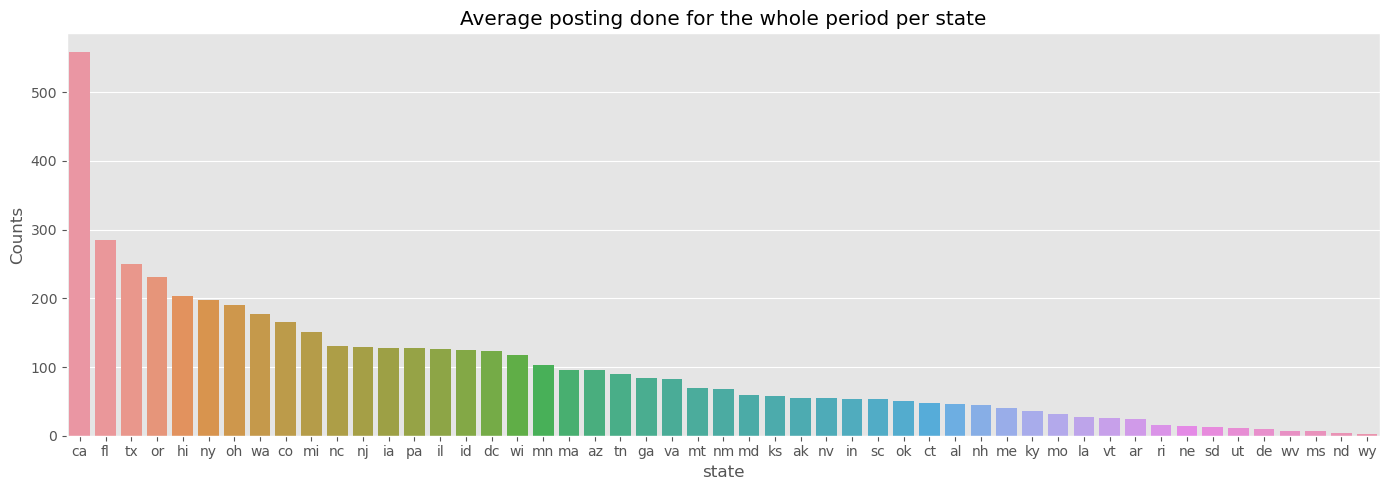

In [125]:
# Barplot of counts
plt.figure(figsize=(14,5))
sns.barplot(data=count_states, x=count_states.index, y='Counts')
plt.title("Average posting done for the whole period per state")
plt.tight_layout()
plt.show()

The business is focused on the state of California a lot, maybe due to better market conditions in that state. California is followed by Florida, Texas and Orlando.

In [83]:
app = Dash(__name__)

# Configuring dashboard
app.layout = html.Div([
    html.H4('Average price and Counts of vehicle posting for the period April 4th to May 5th'),
    dcc.Graph(id='avg_price_per_region'),
    dcc.Dropdown(
        id='state_dropdown',
        options= price_per_region_state['state'].unique(),
        value= price_per_region_state['state'].unique(),  # ['tx']
        multi=True,
        clearable=True
    )
])

# Deploying dashboard
@app.callback(
    Output('avg_price_per_region', 'figure'),
    Input('state_dropdown', 'value')
)

def update_line_chart(value):
    df = price_per_region_state
    mask = df.state.isin(value)

    # Plotting the graph
    fig = px.line(df[mask], x='posting_date', y='Avg. price', 
                    hover_data=['state', 'Counts'], color='region')
    
    return fig

app.run_server(debug=True)

The dashborad above has too much information. We will look at how we can efficiently declutter the dashboard. 

In [49]:
# I want to check the number of records in our data grouping them by state
state_records = df.groupby('state').size()
state_records.name = 'Counts'
state_records.sort_values(ascending=False, inplace=True)

# Checking how many records are represented by the top 20 states
state_records[:10].sum() / df.shape[0]

0.5091204648428043

~75% of the records are represented when selecting the top 20 states by number of records. While ~50 percent records are represented by the top 10 states. 

In order to declutter the dashboard, we will use the top 10 states. 

In [50]:
# Subsetting the top 10 states
state_records_10 = state_records[:10]

In [51]:
# # # I need to instantiate a different dashboard since the one above and this one affect each other

# app_2 = Dash(__name__)

# # Configuring dashboard
# app_2.layout = html.Div([
#     html.H4('Average price and Counts of vehicle posting for the period April 4th to May 5th: Top 10 States'),
#     dcc.Graph(id='avg_price_per_region'),
#     dcc.Dropdown(
#         id='state_dropdown',
#         options= state_records_10.index,
#         value=['ca'],
#         multi=True,
#         clearable=True
#     )
# ])

# # Deploying dashboard
# @app_2.callback(
#     Output('avg_price_per_region', 'figure'),
#     Input('state_dropdown', 'value')
# )

# def update_line_chart(value):
#     df = price_per_region_state
#     mask = df.state.isin(value)

#     # Plotting the graph
#     fig = px.line(df[mask], x='posting_date', y='Avg. price', 
#                     hover_data=['state', 'Counts'], color='region')
    
#     return fig

# app_2.run_server(debug=True)

## Most popular car manufacturer?

In [52]:
# Grouping data by car manufacturer
manufacturer = df.groupby('manufacturer').size().sort_values(ascending=False).reset_index()
manufacturer.columns = ['manufacturer', 'Counts']
# Restricting to the top 20 car manufacturers
manufacturer_20 = manufacturer.iloc[:20]

In [53]:
fig = px.bar(data_frame=manufacturer_20, x='manufacturer', y='Counts', title="Top 20 car manufacturers by popularity")
fig.show()

Car manufacturer renkings according to their popularity is:

1. Ford
2. Chevrolet
3. Toyota
4. Honda
5. Nissan

## Most popular car models

There are 27323 car models that were posted in the period. We cannot visualize all of them, however, we can limit the car models to display to 30.

In [54]:
# Grouping data by model
model_popularity = df.groupby(['model', 'manufacturer']).size().sort_values(ascending=False).reset_index()
model_popularity.columns = ['model', 'manufacturer', 'Counts']

# Limiting to the top 30 car models
model_popularity_30 = model_popularity.iloc[:30]

In [55]:
fig = px.bar(data_frame=model_popularity_30, x='model', y='Counts', title="Top 30 car models by popularity", hover_data=['manufacturer'])
fig.show()

The most posted (assumed bought) cars are: 

1. Ford F-150
2. Chevrolet Silverado 1500
3. Ram 1500
4. Ford Escape
5. Toyota Camry

This distribution of models somewhat correlates to the distribution of popular car manufacturers.

## Top car models by lucrativity

As a measure of lucrativity we will use the maximum possible price of a car model.

In [56]:
# Grouping data by model
model_lucrativity = df.groupby(['model', 'manufacturer'])['price'].max().sort_values(ascending=False).reset_index()
model_lucrativity.columns = ['model', 'manufacturer', 'Max price']

# Limiting to the top 20 car models
model_lucrativity_20 = model_lucrativity.iloc[:20]

In [57]:
fig = px.bar(data_frame=model_lucrativity_20, x='model', y='Max price', title="Top 20 car manufacturers by lucrativity", hover_data=['manufacturer'])
fig.show()

It seems that lamborghini car manufacturers were not properly labelled in the original dataset as they are now displayed as falling under 'ford' manufacturer. However, we can ignore the manufacturer hover details.

Mercedes-benz amg g63 is the most lucrative car model, followed by chevrolet 300 then lamborghini aventador SV roadster.

## Correlations between price and other numeric values

1. What is the relation of odometer to price?
2. What is the relation of year to price?

In [58]:
df.head()

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,state
posting_date,,,,,,,,,,
2021-04-04 00:00:00+00:00,louisville,14995.0,2012.0,cadillac,srx,gas,143049.0,clean,automatic,ky
2021-04-04 00:00:00+00:00,albany,28590.0,2017.0,infiniti,q60 3.0t premium coupe,gas,67004.0,clean,other,ny
2021-04-04 00:00:00+00:00,bellingham,24999.0,2018.0,kia,sportage,gas,21908.0,clean,automatic,wa
2021-04-04 00:00:00+00:00,southern illinois,18977.0,2004.0,chevrolet,corvette,gas,38704.0,clean,automatic,il
2021-04-04 00:00:00+00:00,bellingham,44999.0,2018.0,ram,1500,gas,24577.0,clean,automatic,wa


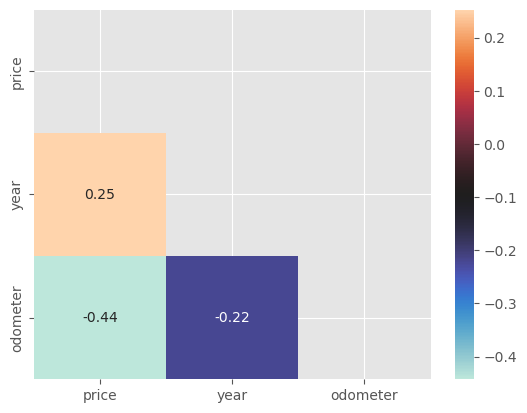

In [128]:
# Calculating the correlations
numerical_corr = df.corr(numeric_only=True)

# plotting a headmap for visualization
sns.heatmap(data=numerical_corr, mask=np.triu(np.ones_like(numerical_corr)), cmap='icefire', annot=True)
plt.show()

There is a low postitive correlation between price and year of manufacture. This is as expected since the norm is, the more recent a car model is, the higher the selling price is set. However we have car data whereby the year of manufacture spans 100 years. We also have to consider that from the distribution of year of manufacture, most of the cars fall between 1998 and 2022 therefore splitting the data into two periods might shed more light on the relationship between year and price. 

We observe a medium negative correlation between odometer and price. This is also as expected by logic, since a car that has been used a lot more should have a lesser price than one that hasn't been used as much.

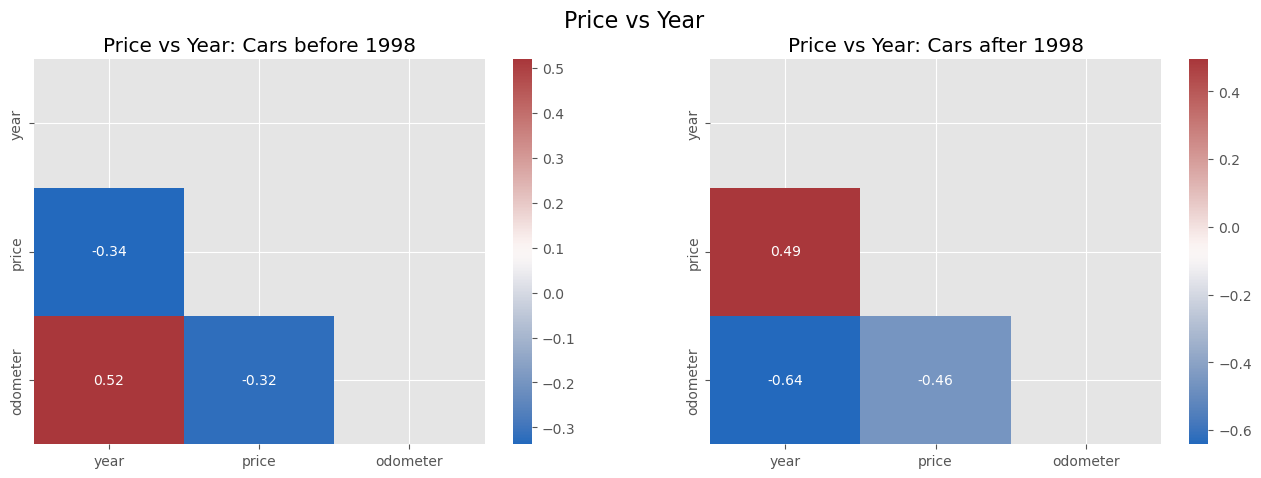

In [133]:
# Splitting year to two gwoups using the margin 1998
before_1998 = df[df['year'] < 1998][['year', 'price', 'odometer']]
after_1998 = df[df['year'] >= 1998][['year', 'price', 'odometer']]

fig, ax = plt.subplots(figsize=(16,5), ncols=2)
plt.suptitle("Price vs Year", fontsize=16)
# Before 1998 heatmap
sns.heatmap(data=before_1998.corr(), mask=np.triu(np.ones_like(before_1998.corr())), cmap='vlag', ax=ax[0], annot=True)
ax[0].set_title("Price vs Year: Cars before 1998")
# After 1998 heatmap
sns.heatmap(data=after_1998.corr(), mask=np.triu(np.ones_like(before_1998.corr())), cmap='vlag', ax=ax[1], annot=True)
ax[1].set_title("Price vs Year: Cars after 1998")

plt.show()

After splitting the data it comes out clearly that there are two categories of cars when looking at them in terms of year of manufacture:

    1. Vintage cars
    2. Modern cars

For modern cars there is a moderate positive correlation between year and price, this means that the more recent a car manufacture year, the higher the selling price. Whereas for the vintage cars, there is a near moderate negative correlation between year and price. In other words, the older a car, the higher the selling price. Which is precicely how vintage cars work.

Odometer readings matter less when it comes to vintage cars than in modern cars, this is attested by the difference in their correlations.

In [134]:
df.head()

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,state
posting_date,,,,,,,,,,
2021-04-04 00:00:00+00:00,louisville,14995.0,2012.0,cadillac,srx,gas,143049.0,clean,automatic,ky
2021-04-04 00:00:00+00:00,albany,28590.0,2017.0,infiniti,q60 3.0t premium coupe,gas,67004.0,clean,other,ny
2021-04-04 00:00:00+00:00,bellingham,24999.0,2018.0,kia,sportage,gas,21908.0,clean,automatic,wa
2021-04-04 00:00:00+00:00,southern illinois,18977.0,2004.0,chevrolet,corvette,gas,38704.0,clean,automatic,il
2021-04-04 00:00:00+00:00,bellingham,44999.0,2018.0,ram,1500,gas,24577.0,clean,automatic,wa
